# EDA：視覺化更多圖表的技巧（作業說明欄請勿調成編輯模式，以防下方示意圖片無法使用）

## 作業程式碼
本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請參考圖一的 2 x 3 子圖配置，分別使用 plt.subplot、plt.subplots() 與 plt.add_subplot() 完成視覺化
3. 請參考圖二的不規則子圖配置以及相對應的圖表種類，利用 plt.GridSpec() 完成視覺化。

<center>

![](%E5%9C%96%E7%89%871.png) 

圖一   
![](%E5%9C%96%E7%89%872.png) 

圖二
</center>

## 匯入套件

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## 匯入資料與簡單的資料探索

In [53]:
# 輸入資料
raw_data=pd.read_csv('C:/Users/Orianna/Desktop/marathon/house-prices-advanced-regression-techniques/train.csv')

# 探索每個資料欄位與遺失值概況

raw_data.info()
raw_data.isnull().sum()
(type(raw_data))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

pandas.core.frame.DataFrame

In [54]:
raw_data.head(10) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [55]:
# 為求學習方便，在此先將有遺失值的資料剔除掉
data=raw_data.dropna(axis=1)
data.head(10) 

Q1 = data['LotArea'].quantile(0.25)  # 計算第一四分位數 (Q1)
Q3 = data['LotArea'].quantile(0.75)  # 計算第三四分位數 (Q3)
IQR = Q3 - Q1  # 計算四分位距

# 計算上下閾值
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 去除離群值
filtered_data = data[(data['LotArea'] >= lower_bound) & (data['LotArea'] <= upper_bound)]

In [56]:
data["Condition1"]

0        Norm
1       Feedr
2        Norm
3        Norm
4        Norm
        ...  
1455     Norm
1456     Norm
1457     Norm
1458     Norm
1459     Norm
Name: Condition1, Length: 1460, dtype: object

## 使用 Subplot 建立子圖

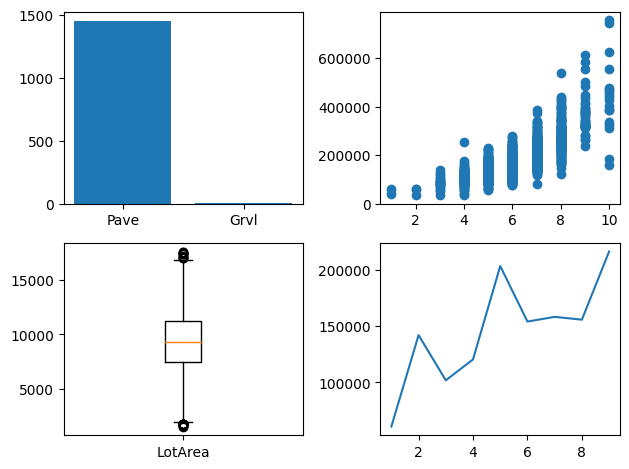

In [57]:
fig=plt.figure()


plt.subplot(2,2,1)
plt.bar(x=data["Street"].value_counts().index, height=data['Street'].value_counts())

plt.subplot(2,2,2)
plt.scatter(x=data["OverallQual"],y=data["SalePrice"])

plt.subplot(2,2,3)
Lot=filtered_data.loc[filtered_data["LotArea"].notna(),"LotArea"]
plt.boxplot(Lot)
plt.xticks([1], ['LotArea'])

plt.subplot(2,2,4)


Condition=data.groupby(by="OverallCond").mean(numeric_only=True)["SalePrice"].to_frame().reset_index()
Condition["OverallCond"] = Condition["OverallCond"].astype(int)
plt.plot(Condition["OverallCond"],Condition["SalePrice"])
plt.tight_layout()  

## 使用 Subplots 建立子圖

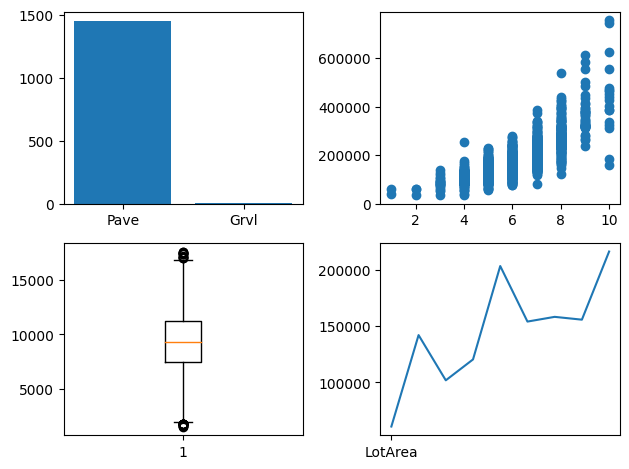

In [58]:


fig,ax =plt.subplots(ncols=2,nrows=2)

ax[0][0].bar(x=data["Street"].value_counts().index, height=data['Street'].value_counts())
ax[0][1].scatter(x=data["OverallQual"],y=data["SalePrice"])
Lot=filtered_data.loc[filtered_data["LotArea"].notna(),"LotArea"]
ax[1][0].boxplot(Lot)
plt.xticks([1], ['LotArea'])



Condition=data.groupby(by="OverallCond").mean(numeric_only=True)["SalePrice"].to_frame().reset_index()
ax[1][1].plot(Condition["OverallCond"],Condition["SalePrice"])
plt.tight_layout()
plt.show()



## 使用 add_subplot 建立子圖

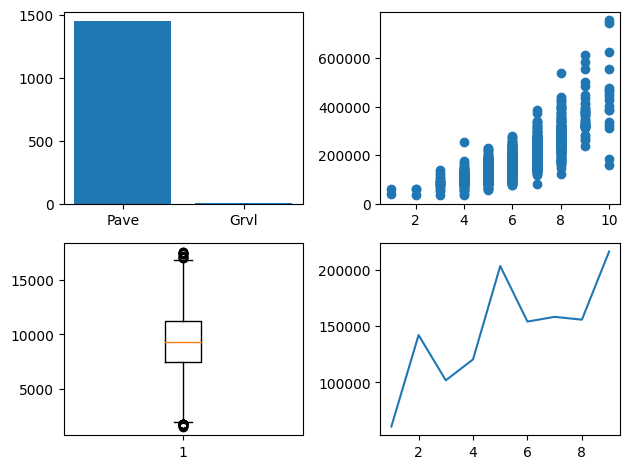

In [59]:
fig=plt.figure()

fig.add_subplot(221)
plt.bar(x=data["Street"].value_counts().index, height=data['Street'].value_counts())

fig.add_subplot(222)
plt.scatter(x=data["OverallQual"],y=data["SalePrice"])

Lot=filtered_data.loc[filtered_data["LotArea"].notna(),"LotArea"]
fig.add_subplot(223)
plt.boxplot(Lot)

fig.add_subplot(224)
Condition=data.groupby(by="OverallCond").mean(numeric_only=True)["SalePrice"].to_frame().reset_index()
plt.plot(Condition["OverallCond"],Condition["SalePrice"])
plt.tight_layout()
plt.show()




## 使用 GridSpec 建置不規則排列

C:\Users\Orianna\AppData\Local\Temp\ipykernel_13204\3026024688.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


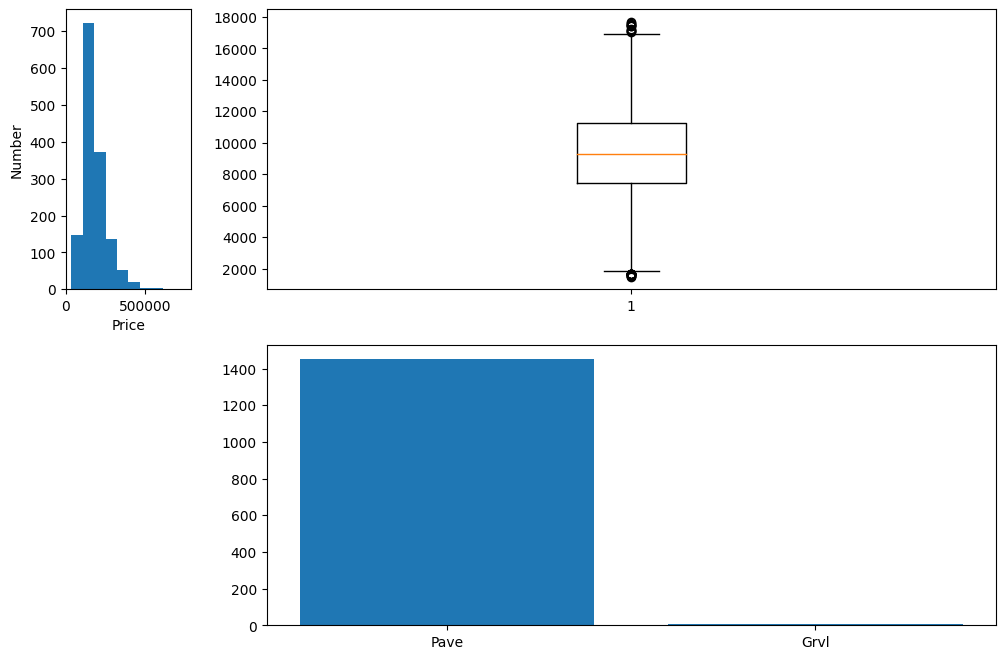

In [60]:
fig=plt.figure(figsize=(12,8))

grid=plt.GridSpec(4,5,wspace = 0.6, hspace = 0.5)
hist1=plt.subplot(grid[:-2,0])
hist1.hist(x=data["SalePrice"])
hist1.set_xlabel("Price")
hist1.set_ylabel("Number")


Lot=filtered_data.loc[filtered_data["LotArea"].notna(),"LotArea"]
boxplot1=plt.subplot(grid[0:2,1:])
plt.boxplot(Lot)

bar1=plt.subplot(grid[2:4,1:])
plt.bar(x=data["Street"].value_counts().index, height=data['Street'].value_counts())


fig.tight_layout()
plt.show()